# Tesseract OCR ㅡ 이미지에서 텍스트 추출

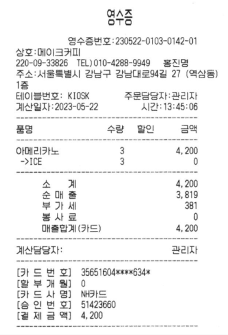

In [3]:
import cv2
import pytesseract

# 1) 1차 기본 텍스트 추출
# Tesseract경로 설정
pytesseract.pytesseract.tesseract_cmd ='C:/Program Files/Tesseract-OCR/tesseract.exe'

image = cv2.imread(r"C:\Users\praye\Documents\Bootcamp\energy_1\raw data\example_bill_large.png" )

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

text = pytesseract.image_to_string(gray_image, lang="kor")

print('추출된 텍스트\n ====================== \n', text)

#  글씨가 작은 이미지는 글자 인식 오류 가능성이 높아짐
# 중간에 구분선이 들어간 부분의 텍스트는 전체 무시됨  (품명 ~ 소계 ~ 매출합계 ~ 계산담당자)


추출된 텍스트
 연 스 즈
０ ㅜ ㅁ

염 수 즘 번 호 :２３０５２２-０１０３-０１4２-０１
상 호 : 메 이 크 커 피
２２０-０9-３３8２6 １8．)０１０-4２88-9949 몸 진 명
주 소 : 서 물 특 별 시 강 남 구 감 남 대 로 94 길 ２7 （ 역 삼 동 )
１ 즘
테 이 블 번 호 : 6１０96 주 문 담 당 자 : 관 리 자
계 산 일 자 :２０２３-０５-２２ 시 간 :１３:4５:０8

[ 카 드 번 호 ］ ３５6５１6０4ｍ０ｍ6３4％
[ 할 부 개 월 ］ ０

[ 카 드 사 명 ］ ㅐ 카 드

[ 슴 인 번 호 ］ ５１4２３０6０

[ 결 제 금 액 ］ 4２００



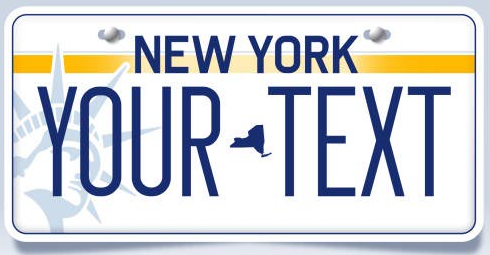

In [156]:
# 2) 2차 정교화 : 이진화 처리

# Tesseract경로 설정
pytesseract.pytesseract.tesseract_cmd ='C:/Program Files/Tesseract-OCR/tesseract.exe'

image = cv2.imread(r"C:\Users\praye\Documents\Bootcamp\energy_1\raw data\car_number.jpg" )

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 이미지 이진화
_, binary = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
# 2번째 매개변수인 임계값이 낮을 수록 텍스트 추출이 안됨됨

text = pytesseract.image_to_string(binary, lang="eng")

print('추출된 텍스트\n ====================== \n', text)

#  글씨가 작은 이미지는 글자 인식 오류 가능성이 높아짐
# 중간에 구분선이 들어간 부분의 텍스트는 전체 무시됨  (품명 ~ 소계 ~ 매출합계 ~ 계산담당자)


추출된 텍스트
 NEW YORK

YOUR*TEXT




In [174]:
# 3) 2차 정교화 : 가우시안 블러 > 이진화 처리
import numpy as np

# Tesseract경로 설정
pytesseract.pytesseract.tesseract_cmd ='C:/Program Files/Tesseract-OCR/tesseract.exe'

image_kor = cv2.imread(r"C:\Users\praye\Documents\Bootcamp\energy_1\raw data\car_number_kor.jpg" )
# image_equal = cv2.equalizeHist(image)
# cv2.imshow("car_number_kor", image_kor)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

gray_image = cv2.cvtColor(image_kor, cv2.COLOR_BGR2GRAY)

burred = cv2.GaussianBlur(gray_image, ksize=(5,5), sigmaX=0)

# 이진화
_, binary_img = cv2.threshold(burred, 125, 200, cv2.THRESH_BINARY_INV)

# cv2.imshow("binary_img", binary_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# 모놀로지 커널
kernel = np.ones((3,3), np.uint8)


# 드릴레이션(팽창) 적용
dilated_img = cv2.dilate(binary_img, kernel, iterations=1)

# # # 히스토그램 평활화 
# # equalized_image = cv2.equalizeHist(gray_image)
cv2.imshow("dilated_img", dilated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [52]:

# 가우시안 블러 & 이미지 이진화
binary = cv2.adaptiveThreshold(equalized_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 21)
# 2번째 매개변수인 임계값이 낮을 수록 텍스트 추출이 안됨됨

cv2.imshow("Binary", binary)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [54]:

text = pytesseract.image_to_string(gray_image, lang="kor")

print('추출된 텍스트\n ====================== \n', text)

#  글씨가 작은 이미지는 글자 인식 오류 가능성이 높아짐
# 중간에 구분선이 들어간 부분의 텍스트는 전체 무시됨  (품명 ~ 소계 ~ 매출합계 ~ 계산담당자)


추출된 텍스트
 


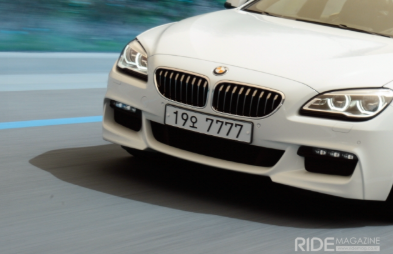

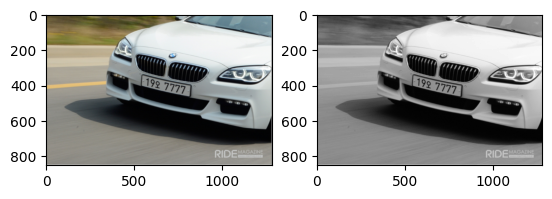

In [62]:
import matplotlib.pyplot as plt
# Tesseract경로 설정
pytesseract.pytesseract.tesseract_cmd ='C:/Program Files/Tesseract-OCR/tesseract.exe'
# 이미지 불러오기
image = cv2.imread(r"C:\Users\praye\Documents\Bootcamp\energy_1\raw data\car_front.png" )
# 그레이스케일
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(gray_image, cmap='gray')


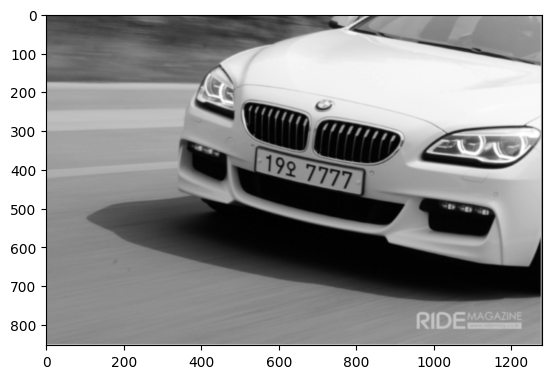

In [116]:
# 가우시안 블러
blurred = cv2.GaussianBlur(gray_image, ksize=(5,5), sigmaX=0)
plt.imshow(blurred, cmap='gray')


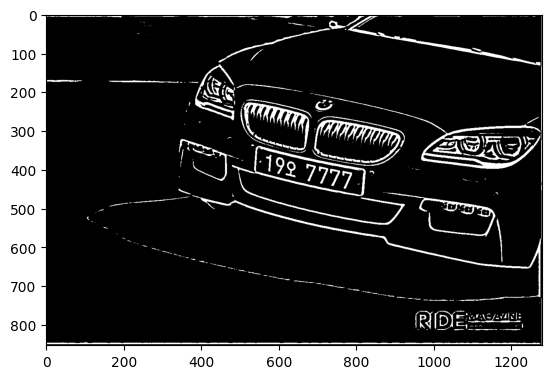

In [154]:
# Thresholds
img_thresh = cv2.adaptiveThreshold(
    blurred,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=9
)
plt.imshow(img_thresh, cmap='gray')


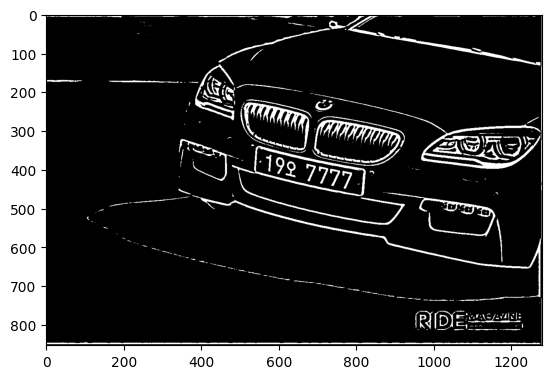

In [155]:
# 윤곽선 찾기 (컨투어)
contours, _ = cv2.findContours(
    img_thresh,
    mode=cv2.RETR_LIST,
    method = cv2.CHAIN_APPROX_SIMPLE
)
temp_result  = cv2.drawContours(img_thresh, contours, -10, (255,255,255), 0)
plt.imshow(temp_result, cmap='gray')


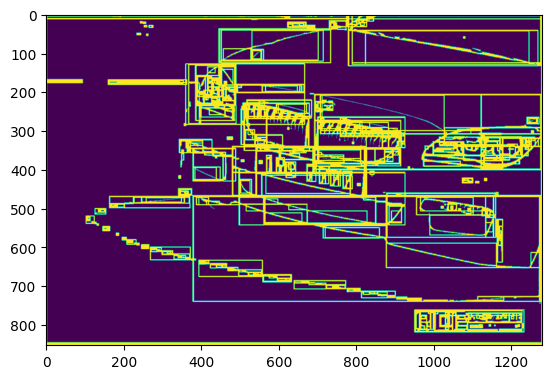

In [150]:
# 윤곽선 중 사각형 찾기
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w*h<100  :
        cv2.rectangle(temp_result, 
                    pt1=(x,y), pt2=(x+w, y+h), 
                    color=(255, 255, 255), thickness=2)

plt.imshow(cv2.drawContours(temp_result, contours, 10, (255, 0, 0), 1))

In [131]:
plt.imshow(cv2.drawContours(temp_result, contours[30:40], 10, (255, 0, 0), 0), cmap='gray')

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\matrix_wrap.cpp:81: error: (-215:Assertion failed) 0 <= i && i < (int)v.size() in function 'cv::_InputArray::getMat_'


In [129]:
len(contours), contours

(334,
 (array([[[  43,  846]],
  
         [[  42,  847]],
  
         [[   0,  847]],
  
         [[   0,  850]],
  
         [[1274,  850]],
  
         [[1275,  849]],
  
         [[1274,  848]],
  
         [[1271,  848]],
  
         [[1270,  847]],
  
         [[1267,  847]],
  
         [[1266,  848]],
  
         [[1264,  848]],
  
         [[1263,  847]],
  
         [[1257,  847]],
  
         [[1256,  848]],
  
         [[1238,  848]],
  
         [[1237,  847]],
  
         [[1231,  847]],
  
         [[1230,  848]],
  
         [[1227,  848]],
  
         [[1226,  847]],
  
         [[1225,  848]],
  
         [[1223,  848]],
  
         [[1222,  847]],
  
         [[1220,  847]],
  
         [[1219,  848]],
  
         [[1217,  848]],
  
         [[1216,  847]],
  
         [[1215,  848]],
  
         [[1214,  848]],
  
         [[1213,  847]],
  
         [[1194,  847]],
  
         [[1193,  848]],
  
         [[1189,  848]],
  
         [[1188,  847]],
  
         [[117